In [3]:
import glob
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.tri as tri
import matplotlib.pyplot as plt
import os
import re
import math

In [4]:
vel_list = np.linspace(0.5,3.8, num = 20)
print(vel_list)


[0.5        0.67368421 0.84736842 1.02105263 1.19473684 1.36842105
 1.54210526 1.71578947 1.88947368 2.06315789 2.23684211 2.41052632
 2.58421053 2.75789474 2.93157895 3.10526316 3.27894737 3.45263158
 3.62631579 3.8       ]


In [8]:
def blasius_lam(vel,visc):
    x = 0.8
    Re = (1400*vel*x)/visc
    y = 5*x/(math.sqrt(Re))
    return y

def blasius_turb(vel,visc):
    Re = (1400*vel*0.9)/visc
    y = 0.37*0.9/(Re**(1/float(5)))
    return y


In [9]:
hb_visc1 = [blasius_lam(u, 0.1) for u in vel_list]
hb_visc1a = [blasius_lam(u, 0.015) for u in vel_list]
hb_visc2 = [blasius_lam(u, 0.01) for u in vel_list]
hb_visc3 = [blasius_lam(u, 0.001) for u in vel_list]
hb_visc4 = [blasius_lam(u, 0.0001) for u in vel_list]


hbt_visc1 = [blasius_turb(u, 0.1) for u in vel_list]
hbt_visc1a = [blasius_turb(u, 0.015) for u in vel_list]

hbt_visc2 = [blasius_turb(u, 0.01) for u in vel_list]
hbt_visc3 = [blasius_turb(u, 0.001) for u in vel_list]
hbt_visc4 = [blasius_turb(u, 0.0001) for u in vel_list]


0.09517426273458444
0.10908847184986595


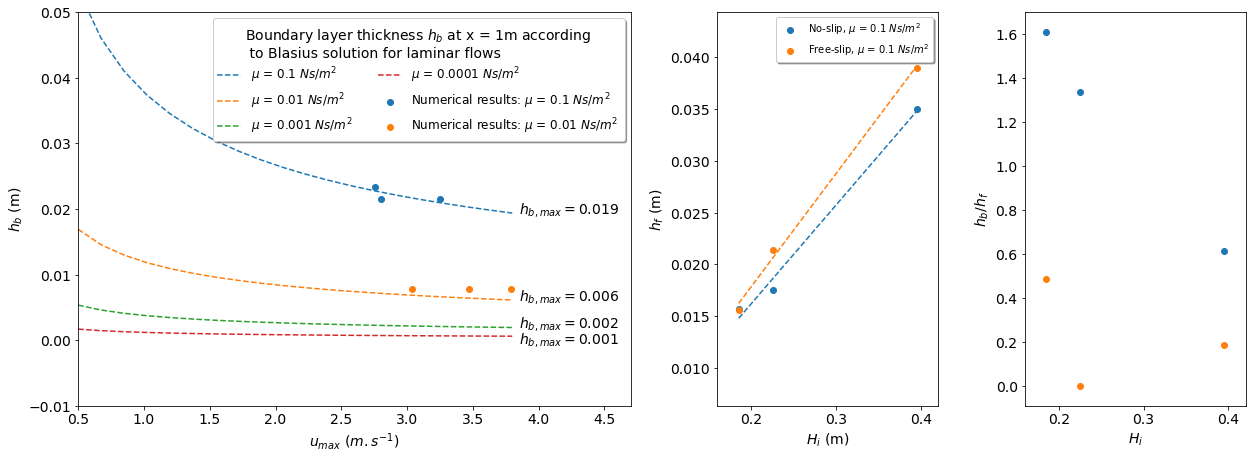

In [13]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

fig, axs = plt.subplots(1, 3, figsize=(18,7), gridspec_kw={'width_ratios': [2.5, 1, 1]})
fig.tight_layout(pad=3.0)
axs[0].set_xlim(0.5,4.7)
axs[0].set_ylim(-0.01,0.05)
axs[0].plot(vel_list, hb_visc1, '--', label = "$\mu$ = 0.1 $Ns/m^{2}$ ")

#axs[0].plot(vel_list, hb_visc1a, '--', label = "$\mu$ = 0.015 ")
axs[0].plot(vel_list, hb_visc2, '--',label = "$\mu$ = 0.01 $Ns/m^{2}$ ")
axs[0].plot(vel_list, hb_visc3, '--', label = "$\mu$ = 0.001 $Ns/m^{2}$ ")
axs[0].plot(vel_list, hb_visc4, '--',label = "$\mu$ = 0.0001 $Ns/m^{2}$ ")
axs[0].scatter([2.8,2., 3.25 ], [0.0215,0.0234, 0.0215 ], label = "Numerical results: $\mu$ = 0.1 $Ns/m^{2}$ ") #Noslip, mu = 0.1
axs[0].scatter([3.04,3.47, 3.79 ], [0.0078,0.0078, 0.0078 ], label = "Numerical results: $\mu$ = 0.01 $Ns/m^{2}$ ") #Noslip, mu = 0.01


axs[0].set_xlabel("$u_{max}$ $(m.s^{-1})$")
axs[0].set_ylabel("$h_{b}$ (m)")
#axs[0].hlines(min(hb_visc1), 1.5, max(vel_list))
#axs[0].hlines(min(hb_visc2), 1.5, max(vel_list))
axs[0].legend(shadow = True, bbox_to_anchor=(1., 1.0), fontsize = 12, loc='upper right', ncol=2, title="Boundary layer thickness $h_{b}$ at x = 1m according \n to Blasius solution for laminar flows")
axs[0].annotate('$h_{b,max}=$'+str(np.round(min(hb_visc1),3)), xy=(3.85, min(hb_visc1)))
axs[0].annotate('$h_{b,max}=$'+str(np.round(min(hb_visc2),3)), xy=(3.85, min(hb_visc2)))
axs[0].annotate('$h_{b,max}=$'+str(np.round(min(hb_visc3),3)), xy=(3.85, min(hb_visc3)))
axs[0].annotate('$h_{b,max}=$'+str(np.round(min(hb_visc4),3)), xy=(3.85, min(hb_visc4)-0.001))


#List of b
#b = [0,0.001,0.005,0.01,0.02,0.04]
#hb_0185_mu1 = [0.0214,0.0195,0.0175,0.0175,0.0175,0.0175] #NOTE: max velocity isn't go good here, need to establish how to define hb
#hb_0185_mu2 = [0.0078,,0.0175,0.0175,0.0175,0.0175]
#axs[1].scatter(b,hb_mu1)

#axs[1].set_xlim(0,4)
#axs[1].set_ylim(0,0.07)
#axs[1].plot(vel_list, hbt_visc1, '--', label = "$\mu$ = 0.1 ")
#axs[1].plot(vel_list, hbt_visc1a, '--', label = "$\mu$ = 0.015 ")
#axs[1].plot(vel_list, hbt_visc2, '--', label = "$\mu$ = 0.01 ")
#axs[1].plot(vel_list, hbt_visc3,  '--',label = "$\mu$ = 0.001 ")
#axs[1].plot(vel_list, hbt_visc4, '--', label = "$\mu$ = 0.0001 ")
#axs[1].set_xlabel("$u_{max}$ $(m.s^{-1})$")
#axs[1].set_ylabel("$h_{f}$ (m)")
#axs[1].legend(shadow = True, bbox_to_anchor=(1., 1.0), fontsize = 12, loc='upper right', ncol=2)



from numpy.polynomial.polynomial import polyfit
Hi = np.array([0.185, 0.225, 0.395])
#Note: hf is different for no slip vs free slip!
hf_noslip = np.array([0.0157, 0.0175, 0.035 ])
uf_noslip = np.array([2.37,2.76, 3.25 ])
b, m = polyfit(Hi, hf_noslip, 1)
print(m)
axs[1].scatter(Hi, hf_noslip, label = "No-slip, $\mu$ = 0.1 $Ns/m^{2}$ ")
axs[1].plot(Hi, b + m * Hi, '--')
axs[1].set_xlabel("$H_{i}$ (m)")
axs[1].set_ylabel("$h_{f}$ (m)")


hf_freeslip = [0.0156, 0.0214, 0.039 ]
uf_freeslip = np.array([3.13, 3.28,  3.75])


b, m = polyfit(Hi, hf_freeslip, 1)
print(m)
axs[1].scatter(Hi, hf_freeslip, label = "Free-slip, $\mu$ = 0.1 $Ns/m^{2}$")
axs[1].plot(Hi, b + m * Hi, '--')
axs[1].legend(shadow = True, bbox_to_anchor=(1., 1.0), fontsize = 10, loc='upper right')

mu1_Hi = np.array([0.1*0.001/(0.185*0.265), 0.1*0.001/(0.225*0.265), 0.1*0.001/(0.395*0.265)])
mu2_Hi = np.array([0.01/(0.185*0.265), 0.01/(0.225*0.265), 0.01/(0.395*0.265)])
hb_hf_noslip_MU1 = np.array([0.0253/0.0157,0.0234/0.0175, 0.0215/0.035 ])
hb_hf_noslip_MU2 = np.array([0.0078/0.016, 0, 0.0078/0.042 ])


axs[2].scatter(Hi, hb_hf_noslip_MU1, label = "hb/hf")
axs[2].scatter(Hi, hb_hf_noslip_MU2, label = "hb/hf")
#axs[2].scatter(mu2_Hi, hb_hf_noslip, label = "hb/hf")
#axs[2].set_xlabel("$(\mu_{flow}*\mu_{water})/(H_{i}H_{0})$")
axs[2].set_ylabel("$h_{b}/h_{f}$")
axs[2].set_xlabel("$H_{i}$")

plt.savefig('Blasius.pdf')

In [11]:
#Now plot h_{f} vs Hi


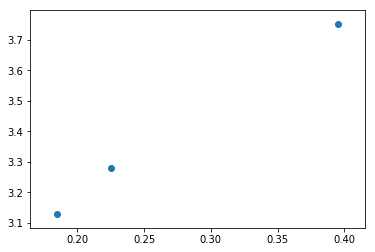

In [187]:
plt.scatter(Hi, uf_freeslip)
#plt.plot(Hi, b + m * Hi, '--')

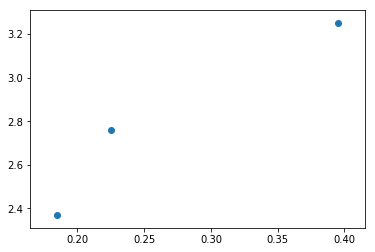

In [192]:
plt.scatter(Hi, uf_noslip)